# Building an image retrieval system with deep features

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:
image_train = pd.read_csv('image_train_data.csv')
print(len(image_train))
image_train.head()

2005


,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...


## Train a nearest-neighbors model for retrieving images using deep features


In [3]:
def str_to_arr(s, new_type=np.int_) : return np.array(s[1:-1].split(' ')).astype(new_type)

image_train['deep_features_2'] = image_train['deep_features'].apply(str_to_arr, new_type=np.float_)
image_train['image_array_2'] = image_train['image_array'].apply(str_to_arr)

In [4]:
def vectorize(vecs) :
    arr = np.hstack(vecs)
    return arr.reshape((len(vecs), int(arr.size/len(vecs))))

X = vectorize(image_train['deep_features_2'])

In [5]:
knn_model = NearestNeighbors(n_neighbors=4, algorithm='auto').fit(X)

## Use image retrieval model with deep features to find similar images

In [6]:
cat = image_train.iloc[18]
cat

id                                                               384
image                                           Height: 32 Width: 32
label                                                            cat
deep_features      [1.04404 0 0 0 0 0 9.49541 0 0 0 0 0 1.01568 0...
image_array        [46 45 50 47 45 51 45 44 49 41 40 45 35 34 39 ...
deep_features_2    [1.04404, 0.0, 0.0, 0.0, 0.0, 0.0, 9.49541, 0....
image_array_2      [46, 45, 50, 47, 45, 51, 45, 44, 49, 41, 40, 4...
Name: 18, dtype: object

In [7]:
def create_dataframe_from_neighbours(distances, indices) :
    nbrs = [(x, image_train.iloc[x]["label"], y) for (x,y) in list(zip(indices[0], distances[0])) ]
    pd.options.display.float_format = '{:,.3f}'.format
    return pd.DataFrame(nbrs, columns=['index', 'label', 'distance'])

distances, indices = knn_model.kneighbors(cat['deep_features_2'])
create_dataframe_from_neighbours(distances, indices)

,index,label,distance
0,18,cat,0.000
1,288,cat,36.940
2,1565,cat,38.463
3,1468,cat,39.756


## Finding similar images to a car

In [8]:
car = image_train.iloc[8]
car

id                                                               136
image                                           Height: 32 Width: 32
label                                                     automobile
deep_features      [0 0 0 0 0 0 7.57379 0 0 0 0 0 0 0 0 1.47279 3...
image_array        [35 59 53 36 56 56 42 62 64 40 59 63 43 60 65 ...
deep_features_2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.57379, 0.0, 0...
image_array_2      [35, 59, 53, 36, 56, 56, 42, 62, 64, 40, 59, 6...
Name: 8, dtype: object

In [9]:
distances, indices = knn_model.kneighbors(car['deep_features_2'])
create_dataframe_from_neighbours(distances, indices)

,index,label,distance
0,8,automobile,0.000
1,372,automobile,32.311
2,1757,automobile,33.925
3,1343,automobile,35.023


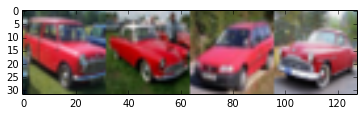

In [10]:
def to_img(lst) :
    it = iter(lst)
    pixels = list(zip(it, it, it))
    im = Image.new('RGBA', (32, 32))
    im.putdata(pixels)
    return im

def get_images_from_ids(ids) : return [ to_img(image_train.iloc[id]['image_array_2']) for id in np.hstack(ids).tolist() ]

def show_neighbors(i) : 
    distances, indices = knn_model.kneighbors(image_train.iloc[i]['deep_features_2'])
    imgs = get_images_from_ids(indices)
    background = Image.new('RGBA', (4*32, 32), (255, 255, 255, 255))
    cnt = 0
    for im in imgs : 
        offset = (im.size[0]*cnt, 0)
        background.paste(im, offset)
        cnt += 1
    plt.imshow(background)

show_neighbors(8)

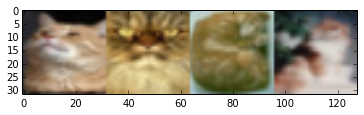

In [11]:
show_neighbors(18)